In [1]:
import pandas as pd
df = pd.read_csv('c:/data/iris/iris.csv')
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [2]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X=df[cols]
y=df['Species']

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [4]:
from sklearn.cluster import MiniBatchKMeans
#batch_size 기본값 100개
model = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=50)
model.fit(X_std)

c:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(batch_size=50, n_clusters=3, random_state=0)

In [5]:
# clustering 결과
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2])

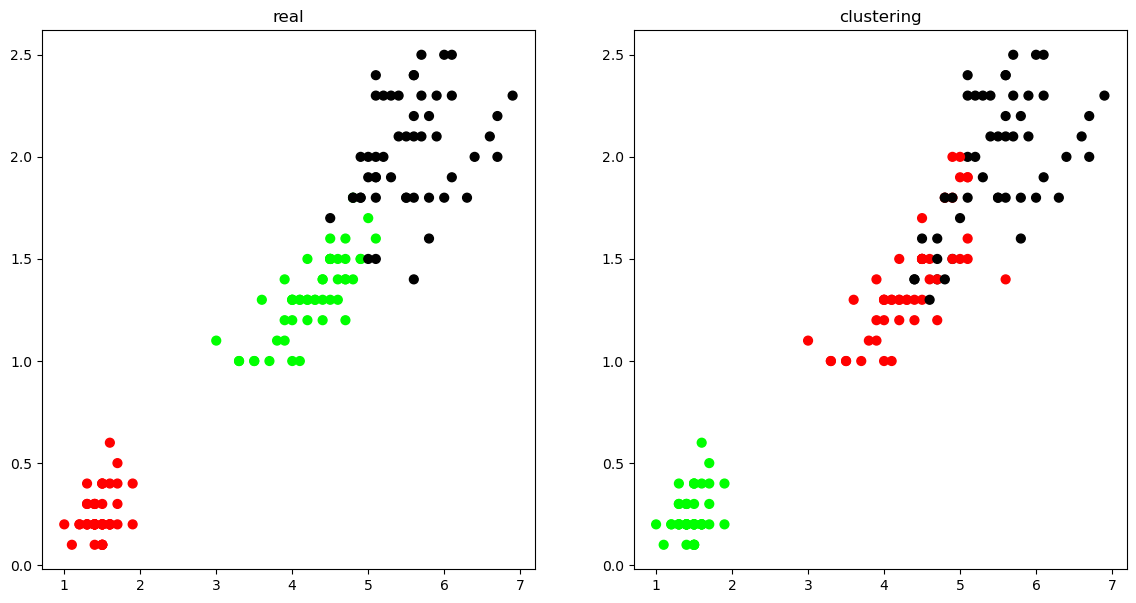

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))
# 색상 배열
colormap = np.array(['red', 'lime', 'black'])
# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X['PetalLength'], X['PetalWidth'], c=colormap[y], s=40)
plt.title('real')
# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(X['PetalLength'], X['PetalWidth'], c=colormap[model.labels_], s=40)
plt.title('clustering')
# clustering은 비교적 잘 되었으나 색상이 다름(label이 다르게 매겨짐)
# kmeans 알고리즘은 정답을 미리 알려주지 않는 비지도학습
# 그룹이 잘 나누어지므로 라벨 번호는 중요하지 않음
plt.show()